In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


1.Exploratory Data Analysis
Objectif: 1
- Comprendre du mieux possible nos données.
- Développer une premiere stratégie de modélisation

Checklist de Base
Analyse de Forme:
- variable target: Charge
- ligne de colonnes: 7
- ligne de variable 

In [2]:

dataset_path = "Dataset_Brief.csv"
df = pd.read_csv(dataset_path)

In [3]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Supprimer les lignes avec des valeurs manquantes
# df = df.dropna()

# Remplacer les valeurs manquantes par la moyenne
# df['colonne'] = df['colonne'].fillna(df['colonne'].mean())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
#duplicates
duplicates = df.duplicated()
duplicates_data = df[duplicates]
#
print("\nLignes avec des duplicatas:")
print(duplicates_data)
#
df = df.drop_duplicates(subset=["age", "sex", "bmi", "children", "smoker", "region"], keep='first')
#
print("\nAprès vérification de duplicatas:")
print(df.head())
df.shape[0]


Lignes avec des duplicatas:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

Après vérification de duplicatas:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


1335

In [5]:
# df['age'] = df['age'].astype(int)
# df['bmi'] = df['bmi'].astype(float)
# df['charges'] = df['charges'].astype(float).round(2)
# df['sex'].replace(['male', 'female'], [0,1], inplace=True)
# df['smoker'].replace(['no', 'yes'], [0,1], inplace=True)
# df.head()

In [6]:
# df['NordOuest'] = df['region'].str.contains('northwest').astype(int)
# df['NordEast'] = df['region'].str.contains('northeast').astype(int)
# df['SudOuest'] = df['region'].str.contains('southwest').astype(int)
# df['SudEast'] = df['region'].str.contains('southeast').astype(int)
# df = df.drop('region', axis=1)

# df = df[['age','sex','bmi','children','smoker','NordOuest','NordEast','SudOuest','SudEast','charges']]
# df.head()

In [7]:
df.describe()

,age,bmi,children,charges
count,1335.000000,1335.000000,1335.000000,1335.000000
mean,39.253933,30.658157,1.097378,13286.778216
std,14.030779,6.101456,1.205727,12115.615150
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.255000,0.000000,4746.698450
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.687500,2.000000,16717.010750
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

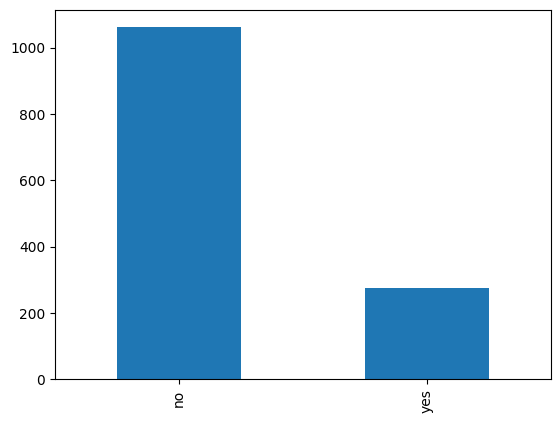

In [8]:
df['smoker'].value_counts().plot.bar()

In [9]:
# plt.figure(figsize=(10, 10))
# sns.barplot(x='sex', y='charges', data=df, estimator='mean')


# plt.title('Moyenne des charges en fonction du sexe')
# plt.xlabel('Sexe')
# plt.ylabel('Moyenne des charges')

# plt.show()

<AxesSubplot:>

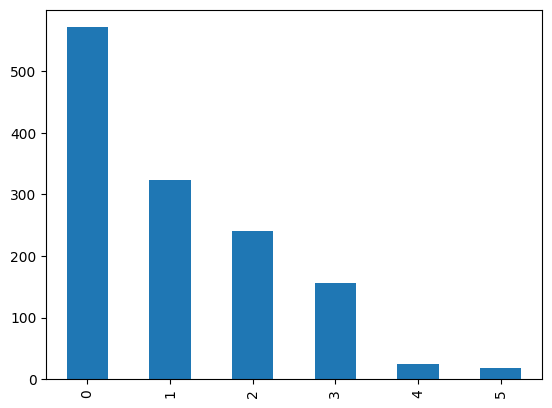

In [10]:
df['children'].value_counts().plot.bar()

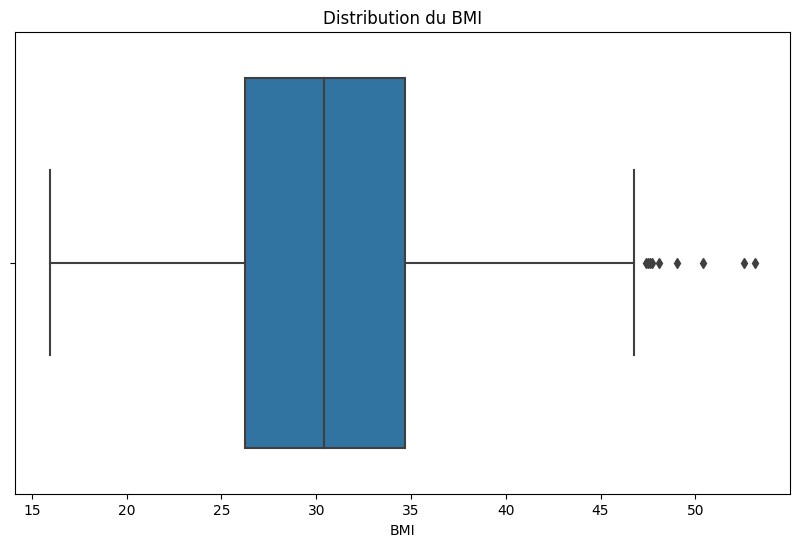

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi', data=df)

# Ajout de titres et d'étiquettes
plt.title('Distribution du BMI')
plt.xlabel('BMI')

# Affichage du graphique
plt.show()

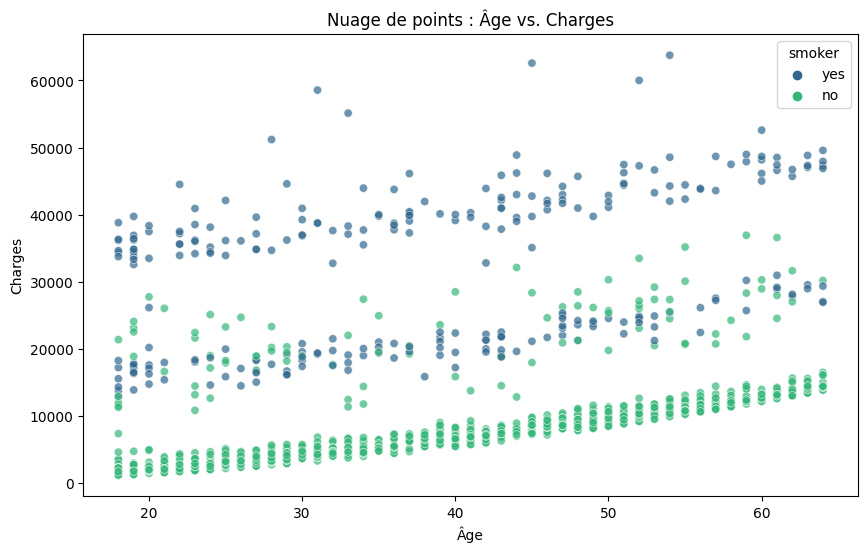

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='viridis', alpha=0.7)

# Ajout de titres et d'étiquettes
plt.title('Nuage de points : Âge vs. Charges')
plt.xlabel('Âge')
plt.ylabel('Charges')

# Affichage du graphique
plt.show()

In [13]:
# # Sélection des colonnes pertinentes
# cols = ['age', 'sex','bmi', 'charges', 'NordOuest', 'NordEast', 'SudOuest','SudOuest']

# # Création de la matrice de corrélation
# correlation_matrix = df[cols].corr()

# # Création d'une heatmap pour visualiser la corrélation
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# # Ajout de titres
# plt.title('Matrice de Corrélation : Âge, BMI, Charges')

# # Affichage de la heatmap
# plt.show()

In [14]:
# # Création d'un nuage de points avec des couleurs pour le BMI
# plt.figure(figsize=(12, 8))
# scatter_plot = sns.scatterplot(x='bmi', y='charges',hue='smoker',  palette='viridis', data=df, size='bmi', sizes=(20, 200), alpha=0.7)

# # Ajout de titres
# plt.title('Nuage de Points : IMC vs. Charges avec Couleurs pour BMI')
# plt.xlabel('bmi')
# plt.ylabel('Charges')

# # Ajout d'une légende pour la taille des points (BMI)
# scatter_plot.legend(title='BMI')

# # Affichage du graphique
# plt.show()

In [15]:
# regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']

# for region in regions:
    
#     data_subset = df[(df[region] == 1) & (df['smoker'] == 1)]

#     plt.figure(figsize=(12, 8))
#     scatter_plot = sns.scatterplot(x='age', y='charges', hue='bmi', palette='viridis', data=data_subset, sizes=(20, 200), alpha=0.7)

#     plt.title(f'Nuage de Points : Charges vs. age des fumeurs dans la région {region}')
#     plt.xlabel('age')
#     plt.ylabel('Charges')

#     scatter_plot.legend(title='Fumeur')
#     plt.show()

In [16]:
# regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']

# for region in regions:
    
#     data_subset = df[(df[region] == 1) & (df['smoker'] == 1)]

#     plt.figure(figsize=(12, 8))
#     scatter_plot = sns.scatterplot(x='bmi', y='charges', hue='bmi', palette='viridis', data=data_subset, sizes=(20, 200), alpha=0.7)

#     plt.title(f'Nuage de Points : Charges vs. BMI des fumeurs dans la région {region}')
#     plt.xlabel('bmi')
#     plt.ylabel('Charges')

#     scatter_plot.legend(title='Fumeur')
#     plt.show()

In [17]:
# regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']

# for region in regions:
    
#     data_subset = df[(df[region] == 1) & (df['smoker'] == 0)]

#     plt.figure(figsize=(12, 8))
#     scatter_plot = sns.scatterplot(x='age', y='charges', hue='bmi', palette='viridis', data=data_subset, sizes=(20, 200), alpha=0.7)

#     plt.title(f'Nuage de Points : age vs. charges des non fumeurs dans la région {region}')
#     plt.xlabel('age')
#     plt.ylabel('Charges')

#     scatter_plot.legend(title='non Fumeur')
#     plt.show()

In [18]:
# regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']

# for region in regions:
    
#     data_subset = df[(df[region] == 1) & (df['smoker'] == 0)]

#     plt.figure(figsize=(12, 8))
#     scatter_plot = sns.scatterplot(x='bmi', y='charges', hue='bmi', palette='viridis', data=data_subset, sizes=(20, 200), alpha=0.7)

#     plt.title(f'Nuage de Points : bmi vs. charges des non fumeurs dans la région {region}')
#     plt.xlabel('bmi')
#     plt.ylabel('Charges')

#     scatter_plot.legend(title='non Fumeur')
#     plt.show()

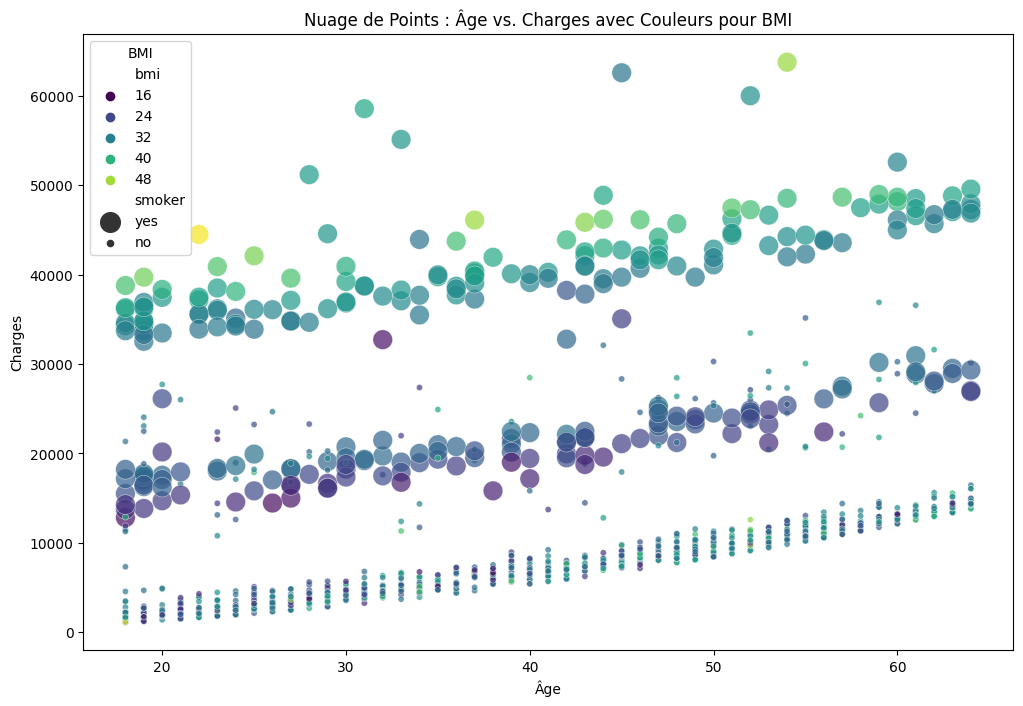

In [19]:
# Création d'un nuage de points avec des couleurs pour le BMI
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='age', y='charges', hue='bmi', palette='viridis', data=df, size='smoker', sizes=(20, 200), alpha=0.7)

# Ajout de titres
plt.title('Nuage de Points : Âge vs. Charges avec Couleurs pour BMI')
plt.xlabel('Âge')
plt.ylabel('Charges')

# Ajout d'une légende pour la taille des points (BMI)
scatter_plot.legend(title='BMI')

# Affichage du graphique
plt.show()

In [20]:
# # unique_sex_values = df['sex'].unique()
# # unique_smoker_values = df['smoker'].unique()

# for sex_value in unique_sex_values:
#     for smoker_value in unique_smoker_values:        
#         data_filter_df = df[(df['sex'] == sex_value) & (df['smoker'] == smoker_value)]        
#         plt.figure(figsize=(10, 6))
#         sns.scatterplot(x='age', y='charges', hue='children', data=data_filter_df, palette='viridis', size='bmi', sizes=(20, 200))
#         plt.title(f"Charges vs Children en fonction de l'âge pour sex = {sex_value}")
#         plt.xlabel('Age')
#         plt.ylabel('Charges')
#         plt.legend(title="Nombre d'enfants")
#         plt.show()
       

In [21]:





df = df[['age','sex' ,'bmi', 'children', 'smoker', 'region', 'charges']]
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


LASSO

In [35]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pickle

selected_features = ['age','sex' ,'bmi', 'children', 'smoker', 'region']
X = df[selected_features]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)

onehotscale_pipeline = make_pipeline(OneHotEncoder(), RobustScaler(with_centering=False))
scale_pipeline = make_pipeline(RobustScaler(with_centering=False))

preprocessing = ColumnTransformer(
    transformers=[
        ('categorical', onehotscale_pipeline, cat_col),
        ('numerical', scale_pipeline, num_col)]
)

param_grid = {'lasso__alpha': [45,50,75,100,150]}


polyscale_pipeline = make_pipeline(PolynomialFeatures(2))

my_final_pipeline = make_pipeline(preprocessing, polyscale_pipeline)
my_final_pipeline.fit(X_train)

model = make_pipeline(
    my_final_pipeline,
    Lasso(random_state=42, max_iter=100000)
)

grid_search = GridSearchCV(model, param_grid,cv =5)
grid_search.fit(X_train, y_train)
grid_score = grid_search.score(X_train, y_train)

best_alpha = grid_search.best_params_['lasso__alpha']

y_pred = grid_search.predict(X_test)

r2_cleaned = r2_score(y_test, y_pred)
mse_cleaned = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse_cleaned = np.sqrt(mse_cleaned)

print("Performance du modèle après suppression des valeurs extrêmes:")
print(grid_search.best_params_)
print(f"R2 Score: {r2_cleaned:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse_cleaned:.2f}")
 
with open('modele.pkl', 'wb') as file:
    pickle.dump(grid_search, file)


Performance du modèle après suppression des valeurs extrêmes:
{'lasso__alpha': 45}
R2 Score: 0.8636
MAE: 2652.77
RMSE: 4454.59


In [ ]:
lasso_model = grid_search.best_estimator_[-1].coef_

resultats = list(zip(selected_features,lasso_model))

resultats

[('age', 0.0),
 ('sex', 3397.513403724742),
 ('bmi', 125.35114213902817),
 ('children', 539.5458258286541),
 ('smoker', 0.0),
 ('region', -0.0)]

<function matplotlib.pyplot.show(close=None, block=None)>

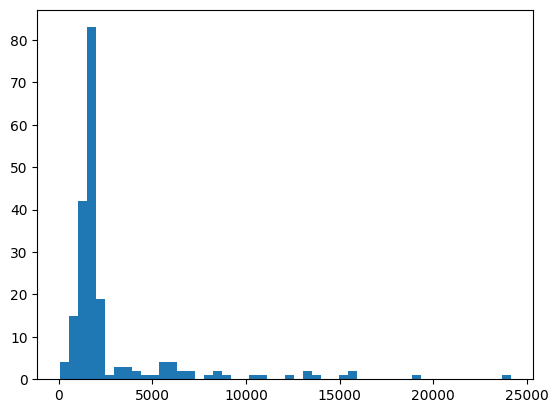

In [ ]:
err_hist = np.abs(y_test-y_pred)

plt.hist(err_hist,bins=50)
plt.show

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=y_pred_cleaned, y=y_train_cleaned, color='blue', alpha=0.5)
# plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
# plt.title('Graphique des résidus')
# plt.xlabel('Prédictions')
# plt.ylabel('Résidus')
# plt.show()

In [ ]:
# residuals = y_test - y_pred


# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.5)
# plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
# plt.title('Graphique des résidus')
# plt.xlabel('Prédictions')
# plt.ylabel('Résidus')
# plt.show()

Chi2
ANOVA
CORRELATION

Pipeline, distance de COOK, analyser les coef. (.coef du lasso), partager le streamlit, boxplot(Q1 Q3 Médiane), 
